## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

#Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df = application_df.drop(columns=["EIN", "NAME"])
df.head(10)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [3]:
# Generate our categorical variable lists
df2 = df.dtypes[df.dtypes == "object"].index.tolist()

In [4]:
df[df2].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [5]:
# Determine the number of unique values in each column.
col_count = df.nunique()
col_count

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
app_count = df['APPLICATION_TYPE'].value_counts()
app_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace
#Using list() Function, index works well for sequential 

application_types_to_replace = list(app_count[app_count < 800].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
class_count = df['CLASSIFICATION'].value_counts(ascending= False)
class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_one = class_count[class_count > 1]
class_one

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

classifications_to_replace = list(class_count[class_count < 800].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
# One-hot encoding the entire dataframe
X_dummies = pd.get_dummies(df)
print(X_dummies.columns)
X_dummies

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T12', 'APPLICATION_TYPE_T13', 'APPLICATION_TYPE_T14',
       'APPLICATION_TYPE_T15', 'APPLICATION_TYPE_T17', 'APPLICATION_TYPE_T19',
       ...
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M',
       'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'],
      dtype='object', length=117)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
# Split our preprocessed data into our features and target arrays
#note--> axis=1 is vertical axis or (axis= 'columns')
X = X_dummies.drop('IS_SUCCESSFUL', axis=1).values
y = X_dummies['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  35
hidden_nodes_layer2 = 5


nn = tf.keras.models.Sequential()
# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 35)                4095      
                                                                 
 dense_1 (Dense)             (None, 5)                 180       
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 4,281
Trainable params: 4,281
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5880 - accuracy: 0.7126
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5542 - accuracy: 0.7301
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5498 - accuracy: 0.7299
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5474 - accuracy: 0.7324
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5462 - accuracy: 0.7341
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5456 - accuracy: 0.7335
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5447 - accuracy: 0.7345
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5436 - accuracy: 0.7344
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5431 - accuracy: 0.7356
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5420 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5322 - accuracy: 0.7416
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5323 - accuracy: 0.7408
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5324 - accuracy: 0.7409
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5323 - accuracy: 0.7411
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5322 - accuracy: 0.7411
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5316 - accuracy: 0.7405
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5324 - accuracy: 0.7410
Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5321 - accuracy: 0.7406
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5323 - accuracy: 0.7410
Epoch 90/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5320 - accuracy: 

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5590 - accuracy: 0.7273 - 397ms/epoch - 1ms/step
Loss: 0.5589835047721863, Accuracy: 0.7273469567298889


<AxesSubplot:>

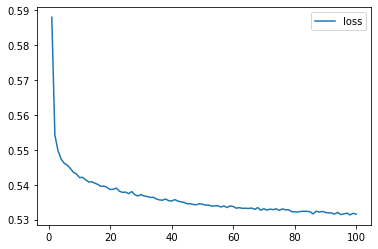

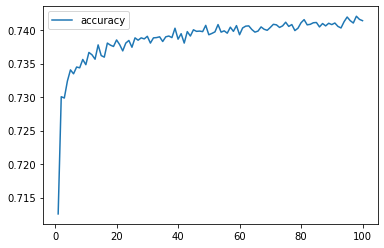

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1
# Plot the loss
history_df.plot(y='loss')
# Plot the accuracy
history_df.plot(y="accuracy")

In [19]:
# Export our model to HDF5 file
nn.save('hdf5_files/AlphabetSoupCharity.h5')

##2nd Model for Optimization
In second attempt, I added an additional layer to improve optimization

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  35
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20

nn2 = tf.keras.models.Sequential()
# First hidden layer
nn2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Third hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 35)                4095      
                                                                 
 dense_4 (Dense)             (None, 20)                720       
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5,256
Trainable params: 5,256
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Train the model
fit_model2 = nn2.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5769 - accuracy: 0.7194
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5514 - accuracy: 0.7321
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5477 - accuracy: 0.7341
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5456 - accuracy: 0.7338
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5448 - accuracy: 0.7349
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5434 - accuracy: 0.7353
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5426 - accuracy: 0.7370
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5419 - accuracy: 0.7368
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5420 - accuracy: 0.7368
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5404 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5304 - accuracy: 0.7428
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5301 - accuracy: 0.7433
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5303 - accuracy: 0.7422
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5297 - accuracy: 0.7430
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5300 - accuracy: 0.7427
Epoch 86/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5304 - accuracy: 0.7427
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5294 - accuracy: 0.7432
Epoch 88/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5295 - accuracy: 0.7435
Epoch 89/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5304 - accuracy: 0.7427
Epoch 90/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5297 - accuracy: 

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5630 - accuracy: 0.7257 - 377ms/epoch - 1ms/step
Loss: 0.5630424618721008, Accuracy: 0.7257142663002014


<AxesSubplot:>

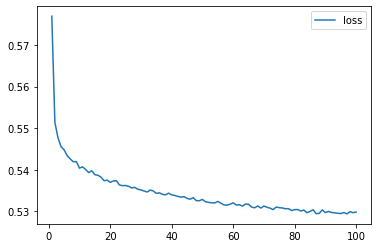

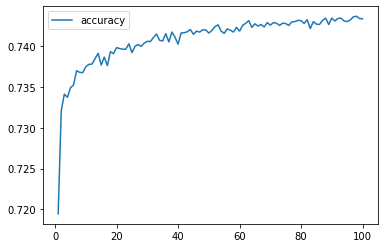

In [24]:
# Create a DataFrame containing training history
history_df2 = pd.DataFrame(fit_model2.history)

# Increase the index by 1 to match the number of epochs
history_df2.index += 1
# Plot the loss
history_df2.plot(y='loss')
# Plot the accuracy
history_df2.plot(y="accuracy")

In [25]:
# Export our model to HDF5 file
nn2.save('hdf5_files/AlphabetSoupCharity2.h5')

## 3rd Attempt for Optimization
Changed the second and third hidden layer activation function and epoch from 100 down to 50 as 2nd attempt failed to show significant improvement.

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  35
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20

nn3 = tf.keras.models.Sequential()
# First hidden layer
nn3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="LeakyReLU"))


# Third hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 35)                4095      
                                                                 
 dense_12 (Dense)            (None, 20)                720       
                                                                 
 dense_13 (Dense)            (None, 20)                420       
                                                                 
 dense_14 (Dense)            (None, 1)                 21        
                                                                 
Total params: 5,256
Trainable params: 5,256
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compile the model
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
# Train the model
fit_model3 = nn3.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
804/804 [==============================] - 2s 1ms/step - loss: 0.5724 - accuracy: 0.7165
Epoch 2/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5533 - accuracy: 0.7308
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5501 - accuracy: 0.7332
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5476 - accuracy: 0.7317
Epoch 5/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5460 - accuracy: 0.7335
Epoch 6/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5445 - accuracy: 0.7343
Epoch 7/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5444 - accuracy: 0.7347
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5440 - accuracy: 0.7356
Epoch 9/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5427 - accuracy: 0.7364
Epoch 10/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5422 - accuracy: 0.7365

In [31]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5517 - accuracy: 0.7266 - 381ms/epoch - 1ms/step
Loss: 0.5516977906227112, Accuracy: 0.7266472578048706


<AxesSubplot:>

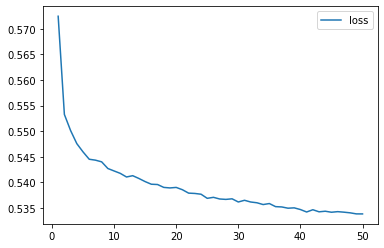

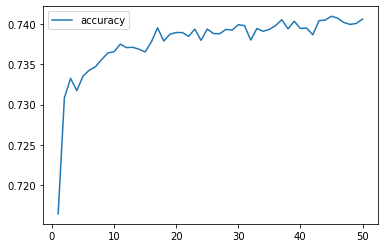

In [33]:
# Create a DataFrame containing training history
history_df3 = pd.DataFrame(fit_model3.history)

# Increase the index by 1 to match the number of epochs
history_df3.index += 1
# Plot the loss
history_df3.plot(y='loss')
# Plot the accuracy
history_df3.plot(y="accuracy")

In [34]:
# Export our model to HDF5 file
nn3.save('hdf5_files/AlphabetSoupCharity3.h5')